<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [35]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


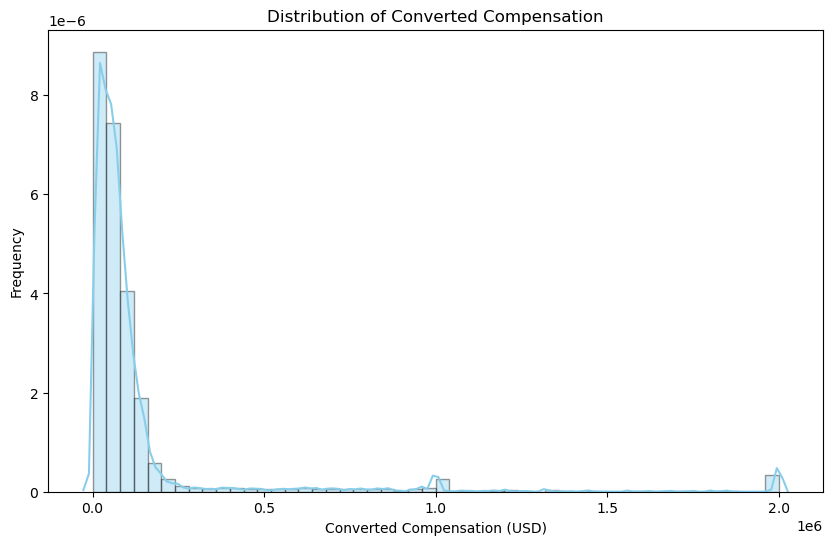

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

# Remove NaN values from the ConvertedComp column
df_cleaned = df.dropna(subset=['ConvertedComp'])

# Plot the distribution curve for ConvertedComp using Seaborn
plt.figure(figsize=(10, 6))
sns.distplot(df_cleaned['ConvertedComp'].dropna(), kde=True, color='skyblue', hist_kws={'edgecolor':'black'})
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.show()


Plot the histogram for the column `ConvertedComp`.


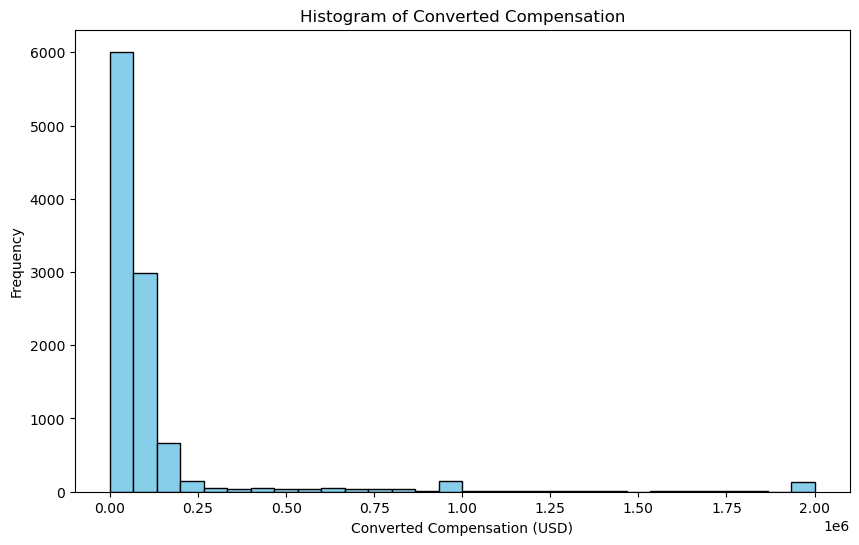

In [12]:
df_cleaned = df.dropna(subset=['ConvertedComp'])

plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['ConvertedComp'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.show()


What is the median of the column `ConvertedComp`?


In [13]:
# Calculate the median of ConvertedComp
median_converted_comp = df_cleaned['ConvertedComp'].median()

print("Median ConvertedComp:", median_converted_comp)

Median ConvertedComp: 57745.0


How many responders identified themselves only as a **Man**?


In [14]:
# Count the number of respondents who identified as 'Man' and have 'Bisexual' sexuality
man_bisexual_count = df_cleaned[(df_cleaned['Gender'] == 'Man') & (df_cleaned['Sexuality'] == 'Bisexual')].shape[0]

print("Number of responders identifying as 'Man' with 'Bisexual' sexuality:", man_bisexual_count)


Number of responders identifying as 'Man' with 'Bisexual' sexuality: 272


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [15]:
# Filter the DataFrame for responders identifying as 'Woman' with 'Bisexual' sexuality
woman_bisexual_df = df_cleaned[(df_cleaned['Gender'] == 'Woman') & (df_cleaned['Sexuality'] == 'Bisexual')]

# Calculate the median ConvertedComp
median_converted_comp_woman_bisexual = woman_bisexual_df['ConvertedComp'].median()

print("Median ConvertedComp for responders identifying as 'Woman' with 'Bisexual' sexuality:", median_converted_comp_woman_bisexual)


Median ConvertedComp for responders identifying as 'Woman' with 'Bisexual' sexuality: 65424.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [16]:
# Calculate the five-number summary for the 'Age' column
age_summary = df_cleaned['Age'].describe(percentiles=[.25, .5, .75])

# Extract the relevant values
min_age = age_summary['min']
q1_age = age_summary['25%']
median_age = age_summary['50%']
q3_age = age_summary['75%']
max_age = age_summary['max']

# Print the five-number summary
print("Five-number summary for the 'Age' column:")
print("Minimum:", min_age)
print("Q1:", q1_age)
print("Median:", median_age)
print("Q3:", q3_age)
print("Maximum:", max_age)

Five-number summary for the 'Age' column:
Minimum: 16.0
Q1: 25.0
Median: 29.0
Q3: 35.0
Maximum: 99.0


Plot a histogram of the column `Age`.


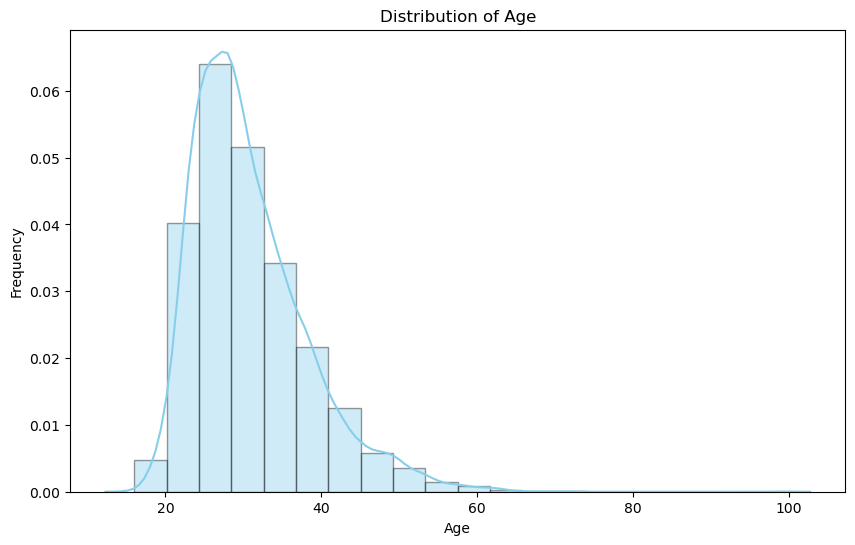

In [19]:
plt.figure(figsize=(10, 6))
sns.distplot(df_cleaned['Age'], bins=20, kde=True, color='skyblue', hist_kws={'edgecolor': 'black'})
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


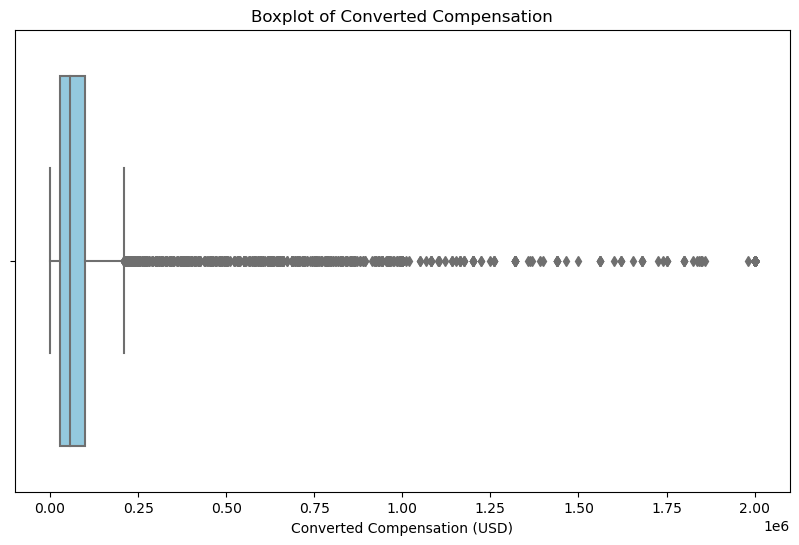

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(df_cleaned['ConvertedComp'], color='skyblue')
plt.title('Boxplot of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [21]:
# Calculate Interquartile Range (IQR)
Q1 = df_cleaned['ConvertedComp'].quantile(0.25)
Q3 = df_cleaned['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

print("Interquartile Range (IQR):", IQR)

Interquartile Range (IQR): 73132.0


Find out the upper and lower bounds.


In [ ]:
# your code goes here


Identify how many outliers are there in the `ConvertedComp` column.


In [23]:
# Calculate upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound for Outliers:", lower_bound)
print("Upper Bound for Outliers:", upper_bound)

Lower Bound for Outliers: -82830.0
Upper Bound for Outliers: 209698.0


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [24]:
# Identify outliers in ConvertedComp column
outliers = df_cleaned[(df_cleaned['ConvertedComp'] < lower_bound) | (df_cleaned['ConvertedComp'] > upper_bound)]

# Count the number of outliers
num_outliers = len(outliers)

print("Number of Outliers in ConvertedComp:", num_outliers)


Number of Outliers in ConvertedComp: 879


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [25]:
# Find correlation between Age and all other numerical columns
correlation_age = df_cleaned.corrwith(df_cleaned['Age'])

print("Correlation between Age and other numerical columns:")
print(correlation_age)


Correlation between Age and other numerical columns:
Respondent       0.002394
CompTotal        0.006949
ConvertedComp    0.105386
WorkWeekHrs      0.031592
CodeRevHrs      -0.015742
Age              1.000000
dtype: float64


Based on the scatter plot of Age and WorkWeekHrs , what kind of  correlation do you see between them?   

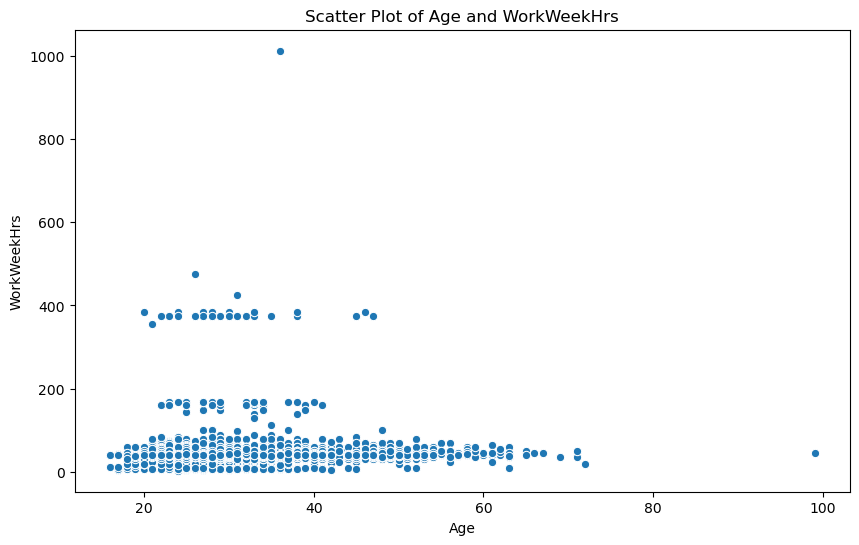

In [30]:

# Remove NaN values from the Age and WorkWeekHrs columns
df_cleaned_age_workweek = df.dropna(subset=['Age', 'WorkWeekHrs'])

# Plot the scatter plot for Age and WorkWeekHrs
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='WorkWeekHrs', data=df_cleaned_age_workweek)
plt.title('Scatter Plot of Age and WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.show()


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
